### Calculate the mean, median, mode and standard deviation for the problem statements 1& 2.

### Problem Statement 1:
The marks awarded for an assignment set for a Year 8 class of 20 students were as follows:

6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = [6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8]
print("mean of given numbers is : ",np.mean(data))
print("median of given numbers is : ",np.median(data))
print("mode of given numbers is : ",stats.mode(data)[0][0])
print("standard deviation of given number is : ", np.std(data))

mean of given numbers is :  6.85
median of given numbers is :  7.0
mode of given numbers is :  7
standard deviation of given number is :  1.5898113095584647


### Problem Statement 2:

The number of calls from motorists per day for roadside service was recorded for a particular month:

28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [12]:
data = [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]
print("mean of given numbers is : ",np.mean(data))
print("median of given numbers is : ",np.median(data))
print("mode of given numbers is : ",stats.mode(data)[0][0])
print("standard deviation of given number is : ", np.std(data))

mean of given numbers is :  107.51428571428572
median of given numbers is :  100.0
mode of given numbers is :  75
standard deviation of given number is :  38.77287080168403


### Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its associated probability:

x = 0, 1, 2, 3, 4, 5

f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01

Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.

<img src="img\expected_value.png">

In [22]:
# here we need to find expected value or mean of binomial variable
x = [0, 1, 2, 3, 4, 5]
fx = [0.09, 0.15, 0.40, 0.25, 0.10, 0.01]

expected_mean = sum(np.multiply(x,fx))
sqr = (x-expected_mean)**2
expected_varience = sum(np.multiply(sqr,fx))

print("Expected number of mean workout in gym during week : ", expected_mean)
print("Expected varience of workout in gym during week : ", expected_varience)

Expected number of mean workout in gym during week :  2.15
Expected varience of workout in gym during week :  1.2275


### Problem Statement 4:
Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) = 20𝑒−20(𝑑−12.5), 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts? What is the CDF when the diameter is of 11mm? What is your conclusion regarding the proportion of scraps?

In [2]:
val = [12.5]
x = 0.1
for i in range(20):
    val.append(12.5+x)
    x+=0.1


In [3]:
import math

In [4]:
def compute_pdf(val):
    pdf = []
    for d in val:
        pdf.append(20*(math.exp((-20*(d-12.5)))))
        
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(val, pdf)
    ax1.set_xlabel('$mm$')
    ax1.set_ylabel('$20e(-20(d-12.5))$')
    return pdf

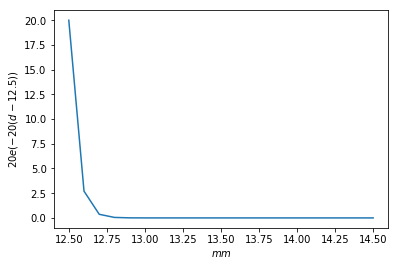

In [5]:
pdf = compute_pdf(val)

In [6]:
import scipy.integrate as integrate

In [10]:
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,12.6,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Proportion of Parts need to scrapped when d >12.6mm is :{P_x[0]}")
print(f"CDF when d= 11mm is:{CDF[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(PDF,12.5,np.inf)[0]}")


Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:nan
Proportion of CDF when d>12.5mm is : 1.0000000000000024


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


### Problem Statement 5:
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6 chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?

Calculate the average value of this process. Also evaluate the standard deviation associated with it.

<img src="img\binom.png">

In [106]:
def fact(x):
    fact = 1
    for i in range(1,x+1):
        fact = fact * i
    return fact

In [107]:
faulty = 0.3
not_faulty = 1-faulty
prob = []
for r in range(6):
    combinations = fact(6)/ (fact(r) * fact(6-r)) 
    probability_rv_x = combinations * ((faulty**r) * (not_faulty**(6-r)))
    prob.append(probability_rv_x)


In [108]:
def plot_graph(N,prob,title):
    X = np.arange(N) # the x locations for the groups
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X, prob)
    ax.set_ylabel('probability')
    ax.set_xlabel('random variable X')
    ax.set_title(title)

    plt.show()
    

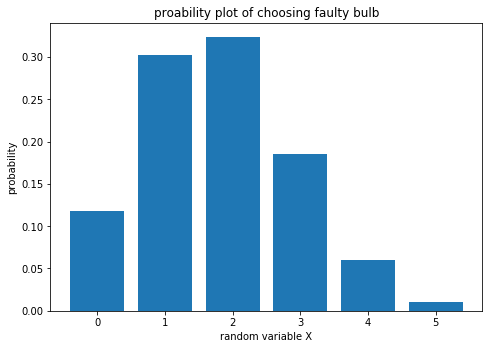

In [109]:
plot_graph(6,prob,'proability plot of choosing faulty bulb')

In [95]:
expected_mean = sum(np.multiply(X,prob))
sqr = (X-expected_mean)**2
expected_varience = sum(np.multiply(sqr,prob))

print("Expected mean of the proccess : ", expected_mean)
print("Expected varience of the process : ", expected_varience)

Expected mean of the proccess :  1.7956259999999995
Expected varience of the process :  1.2471327733024622


### Problem Statement 6:
Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. What is the probability that each of them will solve 5 questions correctly? 

What happens in cases of 4 and 6 correct solutions? What do you infer from it? What are the two main governing factors affecting their ability to solve questions correctly? Give a pictorial representation of the same to validate your answer.

In [114]:
from scipy.stats import binom
import numpy as np

gaurav_correct = 0.75
gaurav_incorrect = 1-gaurav_correct
gaurav_prob = []
for r in range(8):
    combinations = fact(8)/ (fact(r) * fact(8-r)) 
    probability_rv_x = combinations * ((gaurav_correct**r) * (gaurav_incorrect**(8-r)))
    gaurav_prob.append(probability_rv_x)

In [115]:
barkha_correct = 0.45
barkha_incorrect = 1-barkha_correct
barkha_prob = []
for r in range(12):
    combinations = fact(12)/ (fact(r) * fact(12-r)) 
    probability_rv_x = combinations * ((barkha_correct**r) * (barkha_incorrect**(12-r)))
    barkha_prob.append(probability_rv_x)

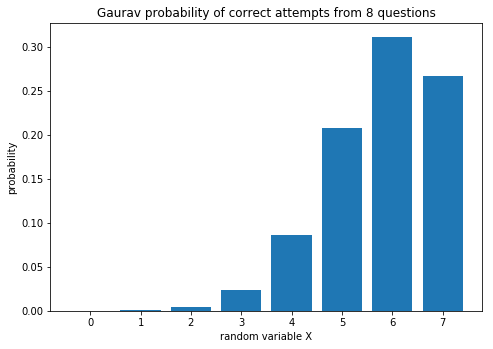

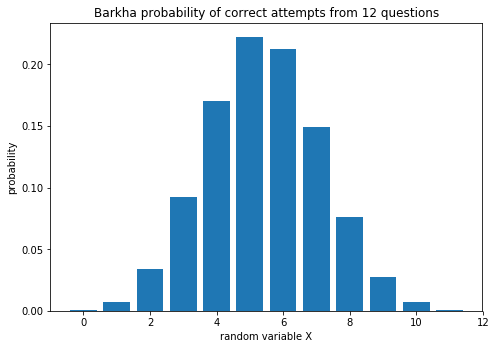

In [116]:
plot_graph(8,gaurav_prob,'Gaurav probability of correct attempts from 8 questions')
plot_graph(12,barkha_prob,'Barkha probability of correct attempts from 12 questions')

In [117]:
print("probability Gaurav will solve 5 questions out of 8 correctly is : ", gaurav_prob[5])
print("probability Barkha will solve 5 questions out of 12 correctly is : ", barkha_prob[5])

probability Gaurav will solve 5 questions out of 8 correctly is :  0.2076416015625
probability Barkha will solve 5 questions out of 12 correctly is :  0.22249823843265837


In [118]:
#Alternatively we can use binom.pmf() function
print("probability Gaurav will solve 5 questions out of 8 correctly is : ", binom.pmf(5,8,0.75))
print("probability Barkha will solve 5 questions out of 12 correctly is : ", binom.pmf(5,12,0.45))


probability Gaurav will solve 5 questions out of 8 correctly is :  0.20764160156250022
probability Barkha will solve 5 questions out of 12 correctly is :  0.22249823843265792


In [120]:
print("probability of Gaurav to solve 4 of 8 is {}, probability of Barkha to solve 4 of 12 is {} : ".format(gaurav_prob[4],barkha_prob[4]))
print("probability of Gaurav to solve 6 of 8 is {}, probability of Barkha to solve 6 of 12 is {} : ".format(gaurav_prob[6],barkha_prob[6]))
                                                                                                        

probability of Gaurav to solve 4 of 8 is 0.086517333984375, probability of Barkha to solve 4 of 12 is 0.16996393213605848 : 
probability of Gaurav to solve 6 of 8 is 0.31146240234375, probability of Barkha to solve 6 of 12 is 0.21238468214026476 : 


from here we can observe that gaurav probability of solving questions is much better than barkha

### Problem Statement 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘 customers arriving in 4 minutes? 
a) 5 customers,
b) not more than 3 customers, 
c) more than 3 customers. 
Give a pictorial representation of the same to validate your answer.

In [127]:
cust_per_minute = (72/60)
lbd = 4 *cust_per_minute # expected number of customers per 4 minutes

In [132]:
def poisson(k, lbd):
    prob = ((lbd**k)/fact(k))*np.exp(-lbd)
    return prob

In [133]:
print(" probability of 5 customer arriving in 4 minutes P(X=5) : ",poisson(5, lbd))
print(" probability of not more than 3 customer arriving in 4 minutes P(X=3) : ",poisson(3, lbd))
print(" probability of more than 3 customer arriving in 4 minutes P(X>=3) : " ,1-poisson(3, lbd))

 probability of 5 customer arriving in 4 minutes P(X=5) :  0.1747476836438828
 probability of not more than 3 customer arriving in 4 minutes P(X=3) :  0.15169069760753717
 probability of more than 3 customer arriving in 4 minutes P(X>=3) :  0.8483093023924628


In [136]:
prob_cust = []
for i in range(11):
    prob_cust.append(poisson(i,lbd))

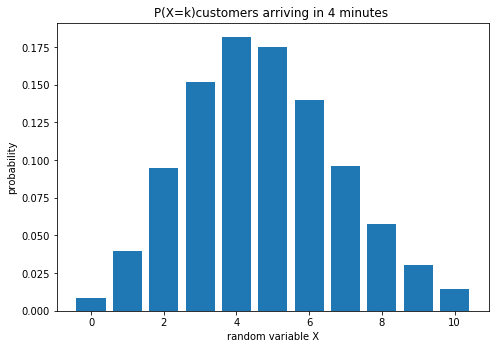

In [139]:
plot_graph(11,prob_cust,"P(X=k)customers arriving in 4 minutes ")

### Problem Statement 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make reports, where I have the efficiency of entering 77 words per minute with 6 errors per hour. What is the probability that I will commit 2 errors in a 455-word financial report?

What happens when the no. of words increases/decreases (in case of 1000 words, 255 words)?

How is the 𝜆 affected?

How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.

In [140]:
words_pm = 77 # speed of typing  = 77 words per minute
error_pm = 6/60 # error per minute is  = 6/60 error per minute
error_per_word = error_pm/words_pm

In [142]:
# error rate for a word of 455 pages
lbd = error_per_word * 455 # expected or average errors I can commit on document of 455 pages

In [144]:
print(" probability of commiting 2 errors in a document of 455 words,  P(X=2) : ",poisson(2, lbd))

 probability of commiting 2 errors in a document of 455 words,  P(X=2) :  0.09669027375144446


In [145]:
def epw(value):
    lbd = error_per_word * value
    return lbd

print(" probability of commiting 2 errors in a document of 1000 words,  P(X=2) : ",poisson(2, epw(1000)))
print(" probability of commiting 2 errors in a document of 1000 words,  P(X=2) : ",poisson(2, epw(255)))

 probability of commiting 2 errors in a document of 1000 words,  P(X=2) :  0.23012815007300153
 probability of commiting 2 errors in a document of 1000 words,  P(X=2) :  0.039377135392854104


In [154]:
words,lbd_lst = [],[]
for i in range(100,1000, 50):
    words.append(i)
    lbd_lst.append(epw(i))

In [169]:
(lbd_lst[2])

0.2597402597402597

In [172]:
X = [range(100,1000, 50)]
X

[range(100, 1000, 50)]

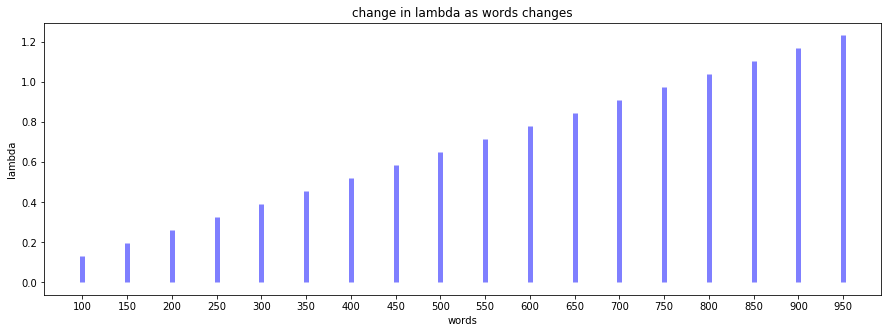

In [180]:
# the x locations for the groups
X = np.arange(100, 1000, 50)
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.set_ylabel('lambda')
ax.set_xlabel('words')
ax.set_title('change in lambda as words changes')
plt.xticks(X)
ax.vlines(X,0,lbd_lst, colors='b', lw=5, alpha=0.5)
plt.show()

### Problem Statement 10:
Please compute the following:

a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)

b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05

c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99

In [185]:
# a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
import scipy.stats as st
print('percent of area above 1.26 std deviations or P(Z > 1.26) = ', 1 - st.norm.cdf(1.26))
print('percent of area below -0.86 std deviations or P(Z < -0.86) = ', st.norm.cdf(-0.86))
print('percent of area above -1.37 std deviations or P(Z > -1.37) = ', 1-st.norm.cdf(-1.37))
a = st.norm.cdf(-1.25)
b = st.norm.cdf(0.37)
print('percent of area between -1.25 and 0.37 std deviations or P(-1.25 < Z < 0.37) = ',b-a)
print('percent of area below -4.6 or P(Z < -4.6) = ',st.norm.cdf(-1.37))

percent of area above 1.26 std deviations or P(Z > 1.26) =  0.10383468112130045
percent of area below -0.86 std deviations or P(Z < -0.86) =  0.1948945212518084
percent of area above -1.37 std deviations or P(Z > -1.37) =  0.914656549178033
percent of area between -1.25 and 0.37 std deviations or P(-1.25 < Z < 0.37) =  0.5386589811336914
percent of area below -4.6 or P(Z < -4.6) =  0.08534345082196698


In [186]:
# b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
print('Z-score of for proability of 0.05 is = ', st.norm.ppf(0.05))

Z-score of for proability of 0.05 is =  -1.6448536269514729


In [189]:
# c) FFind the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99
print('Z-score of for proability of 0.01 is = ', st.norm.ppf(1-.99))
print('Z-score of for proability of 0.99 is = ', st.norm.ppf(0.99))

Z-score of for proability of 0.01 is =  -2.3263478740408408
Z-score of for proability of 0.99 is =  2.3263478740408408


### Problem Statement 11:
The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A and a variance of 4 (𝑚𝐴)2.

What is the probability that a current measurement will exceed 13 𝑚𝐴? 

What is the probability that a current measurement is between 9 and 11mA? 

Determine the current measurement which has a probability of 0.98.

In [192]:
#What is the probability that a current measurement will exceed 13 𝑚𝐴? 
z_score = (13-10)/np.sqrt(4)
print("probability that a current measurement will exceed 13 𝑚𝐴 with P(Z>{}) is : {} ".format(z_score,1-st.norm.cdf(z_score)))

probability that a current measurement will exceed 13 𝑚𝐴 with P(Z>1.5) is : 0.06680720126885809 


In [195]:
# What is the probability that a current measurement is between 9 and 11mA? 
z_score1 = (9-10)/np.sqrt(4)
z_score2 = (11-10)/np.sqrt(4)
prob1 = st.norm.cdf(z_score1)
prob2 = st.norm.cdf(z_score2)
print("probability that a current measurement is between 9 and 11mA", prob2-prob1)

probability that a current measurement is between 9 and 11mA 0.38292492254802624


In [197]:
# Determine the current measurement which has a probability of 0.98
z_score = st.norm.ppf(0.98)
x = z_score*np.sqrt(4) +10
print("measurement which has a probability of 0.98 is : ", x)

measurement which has a probability of 0.98 is :  14.107497821263646


### Problem Statement 12
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓ 0.0015 inch. 

What proportion of shafts are in sync with the specifications? 
If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications?
What is your conclusion from this experiment?

<img src="img\sol.png">

In [207]:
# lets first observe how much Z values above and below are we from the original mean of 0.2508
left_z_score = ((0.2500-0.0015)-0.2508)/0.0005
right_z_score = ((0.2500+0.0015)-0.2508)/0.0005
print("left Z score {} and right Z score {}".format(left_z_score,right_z_score))

left Z score -4.6000000000000485 and right Z score 1.3999999999999568


In [208]:
prob1 = st.norm.cdf(left_z_score)
prob2 = st.norm.cdf(right_z_score)
area = prob2 - prob1
print("proportion in sync with the specification is :", area)

proportion in sync with the specification is : 0.91924122831152


In [209]:
# if the mean is centered at 0.2500
# lets first observe how much Z values above and below are we from the original mean of 0.2508
left_z_score = ((0.2500-0.0015)-0.2500)/0.0005
right_z_score = ((0.2500+0.0015)-0.2500)/0.0005
print("left Z score {} and right Z score {}".format(left_z_score,right_z_score))

left Z score -3.0000000000000027 and right Z score 3.0000000000000027


In [210]:
prob1 = st.norm.cdf(left_z_score)
prob2 = st.norm.cdf(right_z_score)
area = prob2 - prob1
print("proportion in sync with the specification is :", area)

proportion in sync with the specification is : 0.9973002039367398
